# 1. Phase Diagram of HK Model

### 1.1 Defining Mu as Function of Rho 

In [2]:
import numpy as np
from conda.common.logic import FALSE
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

def F(x):
    if 1 >= x >= -1:
        return 1
    else:
        return 0
    
t = 1
    
def rho_hk(mu, U):
    if F(mu / (2 * t)) == 1 and F((mu - U) / (2 *t)) == 1:
        return (np.heaviside(mu + 2*t, 1) + np.heaviside(mu - U + 2 * t, 1) - (1 / np.pi) * 
                (np.arccos(mu / (2 * t)) + np.arccos((mu - U) / (2 * t))))
    elif F(mu / (2 * t)) == 1 and F((mu - U) / (2 *t)) == 0:
        return (np.heaviside(mu + 2*t, 1) + np.heaviside(mu - U + 2 * t, 1) - (1 / np.pi) * 
                np.arccos(mu / (2 * t)))
    elif F(mu / (2 * t)) == 0 and F((mu - U) / (2 *t)) == 1:
        return (np.heaviside(mu + 2*t, 1) + np.heaviside(mu - U + 2 * t, 1) - (1 / np.pi) * 
                np.arccos((mu - U) / (2 * t)))
    elif F(mu / (2 * t)) == 0 and F((mu - U) / (2 *t)) == 0:
        return np.heaviside(mu + 2*t, 1) + np.heaviside(mu - U + 2 * t, 1)
    
def mu_of_rho(rho, U, bracket=(-2, 6)):
    func_mu = lambda mu: rho_hk(mu, U) - rho
    result = root_scalar(func_mu, bracket=bracket, method='brentq')

    if result.converged:
        return result.root
    else:
        raise RuntimeError(f"Keine Nullstelle gefunden für rho={rho}")
    
U = 2


In [3]:
rho_values = np.linspace(0, 2, 1000, endpoint=False)
mu_values = []

for rho_i in rho_values:
    try:
        mu = mu_of_rho(rho_i, U)
        mu_values.append(mu)
    except RuntimeError:
        mu_values.append(np.nan)
        print(f"Keine Nullstelle gefunden für rho={rho_i}")

def one_plot(x_array, y_array,x_label, y_label):
    plt.figure(dpi=100)
    # Plot erstellen
    plt.plot(x_array, y_array, linestyle='-')
    
    # Achsenbeschriftungen und Titel
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()
    
#print(mu_of_rho(1.002, 4) + 2 -4)
 
#print(mu_values)   
#one_plot(rho_values, mu_values, r'$\rho$', r'$\mu$')

### 1.2 Finding $U_c$

In [4]:
def U_c_brent(rho):
    if rho <= 1:
        func_U = lambda U: mu_of_rho(rho, U) + 2 * t - U
        result = root_scalar(func_U, bracket=(0, 4), method='brentq')
    elif rho > 1:
        func_U = lambda U: mu_of_rho(rho, U) - 2 * t
        result = root_scalar(func_U, bracket=(0, 4), method='brentq')
    
    if result.converged:
        return result.root
    else:
        print(result.flag)
        raise RuntimeError(f"Keine Nullstelle gefunden für rho={rho}")
    
def U_c_bisect(rho):
    if rho <= 1:
        func_U = lambda U: mu_of_rho(rho, U) + 2 * t - U
        result = root_scalar(func_U, bracket=(0, 4), method='bisect')
    elif rho > 1:
        func_U = lambda U: mu_of_rho(rho, U) - 2 * t
        result = root_scalar(func_U, bracket=(0, 4), method='bisect')
    
    if result.converged:
        return result.root
    else:
        print(result.flag)
        raise RuntimeError(f"Keine Nullstelle gefunden für rho={rho}")
    
U_c_values = []

for rho_i in rho_values:
    try:
        print(rho_i)
        U_c_i = U_c_bisect(rho_i)
        U_c_values.append(U_c_i)
    except RuntimeError:
        U_c_values.append(np.nan)
        print(f"Keine Nullstelle gefunden für rho={rho_i}")

0.0
0.002
0.004
0.006
0.008
0.01
0.012
0.014
0.016
0.018000000000000002
0.02
0.022
0.024
0.026000000000000002
0.028
0.03
0.032
0.034
0.036000000000000004
0.038
0.04
0.042
0.044
0.046
0.048
0.05
0.052000000000000005
0.054
0.056
0.058
0.06
0.062
0.064
0.066
0.068
0.07
0.07200000000000001
0.074
0.076
0.078
0.08
0.082
0.084
0.08600000000000001
0.088
0.09
0.092
0.094
0.096
0.098
0.1
0.10200000000000001
0.10400000000000001
0.106
0.108
0.11
0.112
0.114
0.116
0.11800000000000001
0.12
0.122
0.124
0.126
0.128
0.13
0.132
0.134
0.136
0.138
0.14
0.14200000000000002
0.14400000000000002
0.146
0.148
0.15
0.152
0.154
0.156
0.158
0.16
0.162
0.164
0.166
0.168
0.17
0.17200000000000001
0.17400000000000002
0.176
0.178
0.18
0.182
0.184
0.186
0.188
0.19
0.192
0.194
0.196
0.198
0.2
0.202
0.20400000000000001
0.20600000000000002
0.20800000000000002
0.21
0.212
0.214
0.216
0.218
0.22
0.222
0.224
0.226
0.228
0.23
0.232
0.234
0.23600000000000002
0.23800000000000002
0.24
0.242
0.244
0.246
0.248
0.25
0.252
0.254
0.256

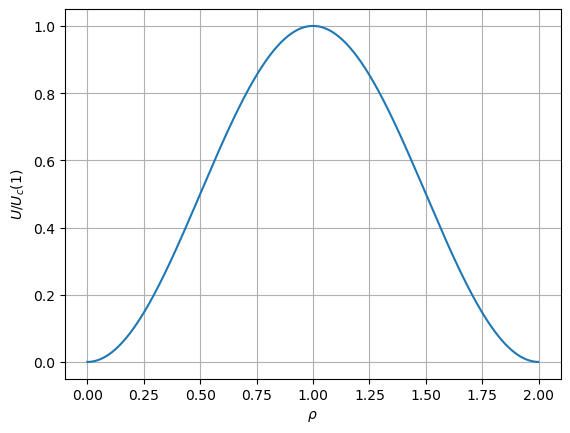

In [5]:
#one_plot(rho_values, U_c_values, r'$\rho$', r'$U$')

U_c_array = np.array(U_c_values)
U_c_normalized = U_c_array / (4 * t)

one_plot(rho_values, U_c_normalized, r'$\rho$', r'$U / U_c(1)$')

### 1.3 Plotting Phase Diagram

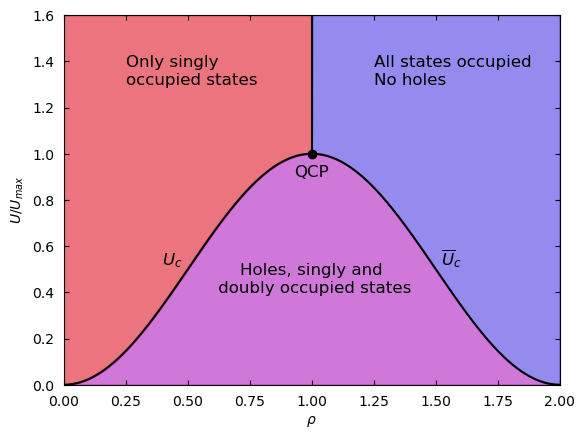

In [18]:
from matplotlib.ticker import MultipleLocator

def phase_diagram(x_values, y_values, x_label, y_label, y_max, title='none', legend=False, fill=True, alph=1):    
    # Create the plot
    fig, ax = plt.subplots()
    
    # Plot the dividing curve
    ax.plot(x_values, y_values, label=r'$U_c$', color='black')
    
    # Plot the vertical line at x = 1, starting from y=1 upwards
    ax.vlines(x=1, ymin=1, ymax=y_max, color='black', linestyle='-', label='MIT')
    
    # Fill areas for visualization (optional)
    if fill:
        ax.fill_between(x_values, y_values, y_max, where=(x_values < 1), 
                        interpolate=True, color='#DF1728', alpha=alph, label='Area 1')
        
        ax.fill_between(x_values, y_values, y_max, where=(x_values > 1), 
                        interpolate=True, color='#4E3DE1', alpha=alph, label='Area 2')
        
        ax.fill_between(x_values, 0, y_values, color='#B11CC2',
                         alpha=alph, label='Area 3 (Above Curve)')
    
    ax.plot(1, 1, marker='o', color='black', markersize=6, label='QCP')
    
    ax.text(1, 0.9, 'QCP', fontsize=12, color='black', ha='center')
    ax.text(0.25, 1.3, 'Only singly \noccupied states', fontsize=12, color='black', ha='left')
    ax.text(1.25, 1.3, 'All states occupied\nNo holes', fontsize=12, color='black', ha='left')
    ax.text(1, 0.4, 'Holes, singly and\n doubly occupied states', fontsize=12, color='black', ha='center')
    ax.text(0.48, 0.52, r'$U_c$', fontsize=12, color='black', ha='right')
    ax.text(1.52, 0.52, r'$\overline{U}_c$', fontsize=12, color='black', ha='left')
    
    # Labels and legend
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    if title != 'none':
        ax.set_title(title)
    if legend == True:
        ax.legend()
    ax.set_xlim(0, 2)
    ax.set_ylim(0, y_max)
    ax.tick_params(top=True, right=True, direction='in', pad=7)
    # Set major tick intervals
    ax.xaxis.set_major_locator(MultipleLocator(0.25))  # x-axis ticks every 0.2 units
    ax.yaxis.set_major_locator(MultipleLocator(0.2))  # y-axis ticks every 0.5 units

    plt.show()
    
phase_diagram(rho_values, U_c_normalized, r'$\rho$', r'$U / U_{max}$', 1.6, fill=True, alph=0.6)

# 2. Phase Diagram of HKL Model

### 2.1 Finding Renormalized $\mu$

Conditions:
\begin{align}
    U_c(\rho) =& \mu(\rho, U_c) - 2t - f_0 \rho \quad \rho < 1 \\
    0 =& \mu(\rho, U_c) + 2t - f_0 \rho \quad \rho > 1 \\
    \rho(\mu, U) =& \rho_{HK}(\mu - f_0 \rho(\mu, U))
\end{align}

In [7]:
def mu_of_rho_renorm(rho, U, f_0):
    bracket=(-2, 2 + U + 2*f_0)
    func_mu = lambda mu: rho_hk(mu - f_0 * rho, U) - rho
    result = root_scalar(func_mu, bracket=bracket, method='brentq')

    if result.converged:
        return result.root
    else:
        raise RuntimeError(f"Keine Nullstelle gefunden für rho={rho}")
    
mu_renorm_values = []
f0 = 8

for rho_i in rho_values:
    print(rho_i)
    try:
        mu = mu_of_rho_renorm(rho_i, 8, f0)
        mu_renorm_values.append(mu)
    except RuntimeError:
        mu_renorm_values.append(np.nan)
        print(f"Keine Nullstelle gefunden für rho={rho_i}")

0.0
0.002
0.004
0.006
0.008
0.01
0.012
0.014
0.016
0.018000000000000002
0.02
0.022
0.024
0.026000000000000002
0.028
0.03
0.032
0.034
0.036000000000000004
0.038
0.04
0.042
0.044
0.046
0.048
0.05
0.052000000000000005
0.054
0.056
0.058
0.06
0.062
0.064
0.066
0.068
0.07
0.07200000000000001
0.074
0.076
0.078
0.08
0.082
0.084
0.08600000000000001
0.088
0.09
0.092
0.094
0.096
0.098
0.1
0.10200000000000001
0.10400000000000001
0.106
0.108
0.11
0.112
0.114
0.116
0.11800000000000001
0.12
0.122
0.124
0.126
0.128
0.13
0.132
0.134
0.136
0.138
0.14
0.14200000000000002
0.14400000000000002
0.146
0.148
0.15
0.152
0.154
0.156
0.158
0.16
0.162
0.164
0.166
0.168
0.17
0.17200000000000001
0.17400000000000002
0.176
0.178
0.18
0.182
0.184
0.186
0.188
0.19
0.192
0.194
0.196
0.198
0.2
0.202
0.20400000000000001
0.20600000000000002
0.20800000000000002
0.21
0.212
0.214
0.216
0.218
0.22
0.222
0.224
0.226
0.228
0.23
0.232
0.234
0.23600000000000002
0.23800000000000002
0.24
0.242
0.244
0.246
0.248
0.25
0.252
0.254
0.256

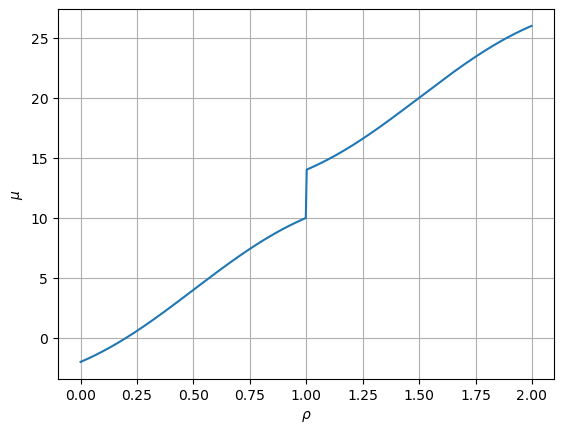

In [8]:
one_plot(rho_values, mu_renorm_values, r'$\rho$', r'$\mu$')

### 2.2 Finding Renormalized $U_c$

In [9]:
def U_c_renorm_bisect(rho, f_0):
    if rho <= 1:
        func_U = lambda U: mu_of_rho_renorm(rho, U, f_0) + 2 * t - f_0 * rho - U
        result = root_scalar(func_U, bracket=(0, 4), method='bisect')
    elif rho > 1:
        func_U = lambda U: mu_of_rho_renorm(rho, U, f_0) - 2 * t - f_0 * rho
        result = root_scalar(func_U, bracket=(0, 4), method='bisect')
    
    if result.converged:
        return result.root
    else:
        print(result.flag)
        raise RuntimeError(f"Keine Nullstelle gefunden für rho={rho}")
    
U_c_renorm_values = []

for rho_i in rho_values:
    try:
        print(rho_i)
        U_c_i = U_c_renorm_bisect(rho_i, f0)
        U_c_renorm_values.append(U_c_i)
    except RuntimeError:
        U_c_renorm_values.append(np.nan)
        print(f"Keine Nullstelle gefunden für rho={rho_i}")

0.0
0.002
0.004
0.006
0.008
0.01
0.012
0.014
0.016
0.018000000000000002
0.02
0.022
0.024
0.026000000000000002
0.028
0.03
0.032
0.034
0.036000000000000004
0.038
0.04
0.042
0.044
0.046
0.048
0.05
0.052000000000000005
0.054
0.056
0.058
0.06
0.062
0.064
0.066
0.068
0.07
0.07200000000000001
0.074
0.076
0.078
0.08
0.082
0.084
0.08600000000000001
0.088
0.09
0.092
0.094
0.096
0.098
0.1
0.10200000000000001
0.10400000000000001
0.106
0.108
0.11
0.112
0.114
0.116
0.11800000000000001
0.12
0.122
0.124
0.126
0.128
0.13
0.132
0.134
0.136
0.138
0.14
0.14200000000000002
0.14400000000000002
0.146
0.148
0.15
0.152
0.154
0.156
0.158
0.16
0.162
0.164
0.166
0.168
0.17
0.17200000000000001
0.17400000000000002
0.176
0.178
0.18
0.182
0.184
0.186
0.188
0.19
0.192
0.194
0.196
0.198
0.2
0.202
0.20400000000000001
0.20600000000000002
0.20800000000000002
0.21
0.212
0.214
0.216
0.218
0.22
0.222
0.224
0.226
0.228
0.23
0.232
0.234
0.23600000000000002
0.23800000000000002
0.24
0.242
0.244
0.246
0.248
0.25
0.252
0.254
0.256

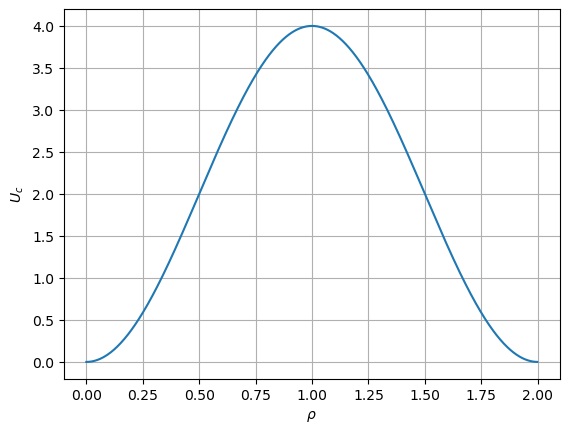

[ 0.00000000e+00 -7.89441401e-10  1.65891834e-09  5.30417310e-09
  1.31331035e-09  4.98766894e-09 -3.72892828e-09 -1.76296453e-08
  1.74077286e-08 -1.50139385e-08  1.51339918e-08  1.09139364e-09
  3.98358679e-08 -4.83123586e-09  2.15368345e-09  4.26662154e-08
  7.03548722e-08  3.09591996e-09  4.27789928e-08  2.10347935e-08
  7.84275471e-08  6.16273610e-09  8.24293238e-08 -1.92158041e-08
 -6.18274498e-08  5.98847691e-08 -9.74978320e-10  2.90965545e-08
  2.79687811e-08 -7.54153007e-09  5.64068614e-08 -1.35743903e-07
  1.19700417e-07  1.18503522e-07  3.41860869e-08 -2.72848411e-09
  8.31532816e-08 -6.55199983e-09 -7.85294105e-08 -1.45082595e-08
 -1.77678885e-08 -3.24143912e-09  6.53562893e-08  1.06432708e-07
  4.97857400e-08 -8.89231160e-08 -2.41743692e-08  2.84162525e-08
  2.12967279e-08  1.32058631e-08  1.26445229e-07 -1.21963240e-07
 -1.32084097e-07  4.72937245e-11  2.65426934e-08 -1.84845703e-08
  1.77646143e-07  4.45397745e-08  9.87347448e-09 -1.24753569e-07
 -3.03807610e-08 -7.56699

In [10]:
one_plot(rho_values, U_c_renorm_values, r'$\rho$', r'$U_c$')
U_c_renorm_array = np.array(U_c_renorm_values)

difference = U_c_array - U_c_renorm_array
print(difference)

# 3. Phase Diagrams in Two Dimensions